# Introduction to programming 3

Clyde Fare and João Pedro Malhado, Imperial College London (contact: [python@imperial.ac.uk](mailto:python@imperial.ac.uk))

This notebook is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/), except <a href="#battleship">this section</a> which is adapted from <a href="https://erlerobotics.gitbooks.io/erle-robotics-learning-python-gitbook-free/content/exercisebattleship/battleship.html">Erle Robotics S.L. book</a> and is licensed under [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 (CC-by-NC-SA) license](http://creativecommons.org/licenses/by-nc-sa/4.0/).

## Overview

In the last workshop of this series we finished covering the most important building blocks of the Python programming language, which are indeed common to many other programming languages (with only syntactic variations). We are thus now equipped to tackle all sorts of problems, and the major challenge in programming is to break down a given problem into simple steps using this language we have learned. The best way to achieve proficiency at doing this is by actual practice.

In the first part of this workshop we shall not be introducing new language elements, and instead focus on a few examples and problem some common themes that appear in attempting to solve them.

We will also look at how to use pieces of code built by others, in the form of modules.

In the second part of the workshop, we will see how to ask for user input and how to run python programs outside of the notebook. We will end by programming a very simple computer game. In doing so we will be touching some aspects of program design.

## Warm up

In the last workshop we learned how loops work, how they introduce repetition in the program, and how by repeating relatively simple operations a complex result can be achieved. We have also seen how to use functions to encapsulate functionality to be reused in different parts of the program.

To review both of these notions we will now create a function *reverse_string()* which given a string will return another string with the characters of the argument string in the reverse order. An example of the function result is

    reverse_string('Rewarder') -> 'redraweR'
    
In the cell below we provide an outline of the function (note it doesn't yet work!). You should fill in the gaps to make it functional.

In [3]:
def reverse_string(input_string):
    "Reverses the order of the characters in input_string"
    
    rev=''
    for index in range(len(input_string)) :
        rev=rev+input_string[-1*(index+1)]
    return rev

In [4]:
input_string="Rewarder"
rev=reverse_string(input_string)
rev

'redraweR'

Note how the function is set up, with *input_string* as an argument of the function, and *rev* as a local variable that will be returned.

Also note the common structure of the loop: we define a result variable (here called *rev*), and update it's value in the loop body. In this case, the function output is directly the result variable.

The great advantage of defining a function is that we can now apply it to many different cases without rewriting the same code again and again. Let's use it then

    reverse_string('0123')

In [5]:
reverse_string('0123')

'3210'

    reverse_string('Noon')

In [6]:
reverse_string('Noon')

'nooN'

    reverse_string('stressed')

In [7]:
reverse_string('stressed')

'desserts'

## Nested loops

Data will often take the form of lists of lists (which can be seen as 2D or higher dimension lists), and we might be interested in doing operations on, or using every element of these lists. Such operations often require running more than one loop simultaneously. Let us look at the example case of the following table

    table=[[1,1.2,'a'],
           [2,2.3,'b'],
           [3,3.4,'c']]

In [8]:
table=[[1,1.2,'a'],
       [2,2.3,'b'],
       [3,3.4,'c']]

First, we will print *x&#42;2* for every *x* element of *table* (note that this operation exist for both numbers and strings but with different effects). To do this we need 2 loops:

* The first will loop through the elements of *table*: i.e. each of the inner lists.
* The second will loop through the elements of the inner lists.

It will look like the following:

    for row in table:
        for x in row:
            print(2*x)

In [9]:
for row in table:
    for x in row:
        print(2*x)

2
2.4
aa
4
4.6
bb
6
6.8
cc


We are using loop variable names that are indicative of what these variables are in the algorithm. The first for loop is "picking out" the rows of the table. For each value of *row*, the second loop is "picking out" individual elements of *row*.

It is perhaps helpful to introduce some print functions to better understand what the code is doing. It is important to note indentation and which print statement belongs to which loop body to understand when it is being executed

    for row in table:
        print('row=',row)
        for x in row:
            print('x=',x)
            print(2*x)

In [10]:
for row in table:
    print('row=',row)
    for x in row:
        print('x=', x)
        print(2*x)

row= [1, 1.2, 'a']
x= 1
2
x= 1.2
2.4
x= a
aa
row= [2, 2.3, 'b']
x= 2
4
x= 2.3
4.6
x= b
bb
row= [3, 3.4, 'c']
x= 3
6
x= 3.4
6.8
x= c
cc


If it is not clear how the nested loops are working, please ask a demonstrator.

We could obtain exactly the same results by using indexes to extract the elements of *table*.

    for i in range(3):
        for j in range(3):
            print(2*table[i][j])

In [11]:
for i in range(3):
    for j in range(3):
        print(2*table[i][j])

2
2.4
aa
4
4.6
bb
6
6.8
cc


Adding some print statements to make things clearer

    for i in range(3):
        print("i=",i)
        for j in range(3):
            print("j=",j)
            print("table[i][j]=",table[i][j])
            print(2*table[i][j])

In [12]:
for i in range(3):
    print("i=",i)
    for j in range(3):
        print("j=",j)
        print("table[i][j]=", table[i][j])
        print(2*table[i][j])

i= 0
j= 0
table[i][j]= 1
2
j= 1
table[i][j]= 1.2
2.4
j= 2
table[i][j]= a
aa
i= 1
j= 0
table[i][j]= 2
4
j= 1
table[i][j]= 2.3
4.6
j= 2
table[i][j]= b
bb
i= 2
j= 0
table[i][j]= 3
6
j= 1
table[i][j]= 3.4
6.8
j= 2
table[i][j]= c
cc


Note that the variables we are looping over are integers running from 0 to 2. In this case we know the shape of the array and can explicitly set the loop bounds with range(3). In cases when we don't know, or don't want to know, the size of the table we are dealing with, we can write a more generic form

    for i in range(len(table)):
        for j in range(len(table[i])):
            print(2*table[i][j])

In [13]:
for i in range(len(table)):
    for j in range(len(table[i])):
        print(2*table[i][j])

2
2.4
aa
4
4.6
bb
6
6.8
cc


We have just shown that we can loop over list elements or list indexes to obtain the same result. The first way is often simpler and more natural in Python, while the second way is more common in most other programming languages.

There are some cases when using indexes can be handy. For example, until now we have been printing the result of the operations following each row "horizontally", and moving to the next row "below" it. Write some code using indexes that will perform the same operation but following down the columns of *table*.

In [14]:
for i in range(len(table)):
    for j in range(len(table[i])):
        print(2*table[j][i])

2
4
6
2.4
4.6
6.8
aa
bb
cc


So far we have been performing operations on every element of the list and printing the result to the screen. This is not a particularly useful operation, and we often want to make a transformation to the full table and keep it. We can do this by building a new table *table2*

    table2=[]
    for row in table:
        new_row=[]
        for x in row:
            new_row=new_row+[2*x]
        table2=table2+[new_row]
        
    table2

In [15]:
table2=[]
for row in table:
    new_row=[]
    for x in row:
        new_row=new_row+[2*x]
    table2=table2+[new_row]
table2

[[2, 2.4, 'aa'], [4, 4.6, 'bb'], [6, 6.8, 'cc']]

Note that we have defined 2 result variables, *table2* and *new_row*, each updated on a different loop. *table2* is initialized to an empty list and is updated at the end of the body of the first loop. *new_row* is initialized to an empty list **in each cycle** of the first loop, build up inside the second loop, and appended to *table2* after the second loop has finished.

This is a comon construction when building new tables, it is important that you understand how it works. If it is not completelly clear, try adding some print statements to the code above.

Although very common in 2D lists, nested loops also occur in other contexts.
As an example, we will now consider how to generate a list of all the prime numbers below 100. We will approach the problem in the simplest, albeit not very efficient, way: we will loop through every number between 1 and 100 and test if each of them is a prime number. To test if each number is a prime we need a second loop where we test if the number is devisable by any of the numbers smaller than itself.

We will provide the outline of the code and let you fill the gaps to make it functional.

In [16]:
primes=[]

for i in range(2,100):
    isprime = True
    for j in range(2, i):

        if i%j == 0:
            isprime = False
    if isprime:
        primes=primes+[i]
        
primes

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

Although common, this type of nested loops can get relatively complicated to read and understand. It is often possible to avoid them by defining a function that will do the work being done in the inner loop seperately.

In the case of the list of prime numbers, we could make our lives easier if we define a function *isprime()* that will return a boolean indicating if the argument is a prime number. Define such a function below.

(If you are feeling confident, you can define your function using a while loop instead of a for loop. Note that if a number is devisible, for example by 2, we already know the number is not a prime, so no need to test division by other numbers. This will make the program more efficient as it will do fewer loop steps.)

In [17]:
def isprime(num):
    "Is the number prime?"
    isprime=True
    for i in range(2,num):
        if num%i==0:
            isprime=False
    if isprime:
        k="prime"
    else:
        k="not prime"
    return k

Use the function isprime() to retrieve the list of the prime numbers below 100

In [18]:
isprime(97)

'prime'

### Sorting

Sorting the elements of a list is another operation that requires the use of nested loops. This is an important operation in many contexts and although simple to state, there are [many different algorithms](https://en.wikipedia.org/wiki/Sorting_algorithm) to achieve this task (performance can be a concern for big or frequent operations, think about sorting Twitter message by time).

Although Python has the built-in function *sorted()* and the list method *.sort()* to do this operation, we will be looking at a variation of the simple Insert Sort algorithm in order to practice more general implementations.

We will build a new ordered list by taking elements of the original list and inserting them into the new ordered list in such a way that our new list is always in the right order. Let us try to picture how it would work:

*Step 0:* initial state

    original_list=[3,1,2]
    ordered_list=[]
    
*Step 1:* we pick the first element of the orginial_list and place it in the ordered_list

                   |
    original_list=[3,1,2]
    ordered_list=[3]

*Step 2:* select the second element of original_list and place it in position 0 of the ordered_list

                     |
    original_list=[3,1,2]
    ordered_list=[1,3]

*Step 3:* select the third element of the original_list and place it in position 1 of the ordered_list

                      |
    original_list[3,1,2]
    ordered_list[1,2,3]

Remember from the first workshop how to insert an element in a list in a specific position? (You can also use the *.insert()* list method to do this operation.)

    ordered_list=[1,2,4,5,6]
    ordered_list[2:2]=[3]

In [19]:
ordered_list=[1,2,4,5,6]
ordered_list[2:2]=[3]
ordered_list

[1, 2, 3, 4, 5, 6]

Perhaps it is already apparent where the nested loop structure is comming from in the algorithm above:

* First loop to select the elements of the original list in turn.
* Second loop to check in which position to insert the new element in the ordered list.

Instead of trying to implement the algorithm all in one piece of code, we will split out the task of inserting elements in the correct position of an ordered list. Define the function *insert_in_order(num,ordered_list)* which will receive  as arguments a number and an ordered list, and will return an ordered list where the number passed will be in the correct position. 

E.g. executing insert_in_order with arguments 3, [1,2,4,5] will return [1,2,3,4,5]

In [20]:
def insert_in_order(num, ordered_list):
    "Inserts number in order"
    i=0
    insert = False
    for a in ordered_list:
        
        if num < a and not insert:
            ordered_list[i:i]=[num]
            insert = True
        
        i=i+1
    if num > ordered_list[-1]:
        ordered_list = ordered_list + [num]
    return ordered_list

Test is your insert_in_order() function

    olist=list(range(0,20,3))
    insert_in_order(8,olist)    

In [21]:
olist=list(range(0,20,3))
insert_in_order(8,olist)

[0, 3, 6, 8, 9, 12, 15, 18]

Now define a function *insert_sort(unordered_list)* that receives an unordered list as argument and returns an ordered list with the same elements, that uses the *insert_in_order()* function defined above.

In [22]:
def insert_sort(unordered_list):
    "order an unordered list"
    ordered_list=[unordered_list[0]]
    for a in unordered_list[1:]:
        ordered_list = insert_in_order(a, ordered_list)
    return ordered_list

Does it work?

    insert_sort([91, 80, 34, 97,  9, 93, 50, 49,  6, 46])

In [23]:
insert_sort([91,80,34,97,9,93,50,49,6,46])

[6, 9, 34, 46, 49, 50, 80, 91, 93, 97]

## Distilling alcohols

The list *organic_mix* defined below groups a bunch of strings with chemical fomulae for simple organic molecules

In [24]:
organic_mix=['CH2CH2','CH3CHCH2','(NH2)2CO','CH2ClCH2Cl','CH2CHCl','C6H6','C6H5CH2CH3','CH3O(CH3)3',
             'C6H5CHCH2','CH3OH','CH2O','C6H4(CH3)2','CH3CH2OH','C6H5OH','C6H3(OH)2Br','CH2OHCH2OH',
             'CH3CHCH3CHOHCH3','C6H3(OH)2CH2CHNH2CO2H','CH3CHOHCH2CH2OH','C6H8(OH)2','CHCl3,CH3CO2H',
             'CH3OCH3','CH3COCH3','CH3CH2CH2CH2OH']

The first goal is to create a function *distill()*. This function will take as an argument a list of chemical formulae. It will return a list containing the alcohols present in the original list.

(Note that in the chemical formulae above, carboxylic acid groups are written as 'CO2H'. If you want a more challenging problem you can change the chemical formulae of acids in the list to read like 'COOH')

Before writing your function, think about:

* What type of result should your function return?
* How do you "build" such result?
* Do you need a loop? What should the loop variable be?
* What kind of tests (*if* statements) do you need to do while building your result?

In [51]:
def distill(organic_mix):
    "Show all alcohols in organic mix"
    alcohols=[]
    for compound in organic_mix:
        if "OH" in compound:
            alcohols=alcohols + [compound]
    return alcohols

In [52]:
organic_mix=['CH2CH2','CH3CHCH2','(NH2)2CO','CH2ClCH2Cl','CH2CHCl','C6H6','C6H5CH2CH3','CH3O(CH3)3',
             'C6H5CHCH2','CH3OH','CH2O','C6H4(CH3)2','CH3CH2OH','C6H5OH','C6H3(OH)2Br','CH2OHCH2OH',
             'CH3CHCH3CHOHCH3','C6H3(OH)2CH2CHNH2CO2H','CH3CHOHCH2CH2OH','C6H8(OH)2','CHCl3,CH3CO2H',
             'CH3OCH3','CH3COCH3','CH3CH2CH2CH2OH']
distill(organic_mix)

['CH3OH',
 'CH3CH2OH',
 'C6H5OH',
 'C6H3(OH)2Br',
 'CH2OHCH2OH',
 'CH3CHCH3CHOHCH3',
 'C6H3(OH)2CH2CHNH2CO2H',
 'CH3CHOHCH2CH2OH',
 'C6H8(OH)2',
 'CH3CH2CH2CH2OH']

We will go further in defining a function called *frac_distill()*, that will return a list of two lists. The first of such lists will contain the formulae of simple alcohols, while the second list will contain the diols.

One way to approach this problem is:

* First, define an auxiliar function *isdiol()* which will identify if a given formula is a diol.
* In *frac_distill()* use the function *distill()* to generate an intermediary list with all alcohols.
* In *frac_distill()* use the function *isdiol()* to create two lists for simple alcohols and diols.

(In identifying diols we also want to look for the cases written as '(OH)2'. In terms of the implementation of isdiol() you will probably want to use indexes and check 2 characters in the string at a time.)

In [27]:
def count_substr(string):
    """
    Count how many times substring appears in string
    >>> count_substr('ana', 'banana')
    2
    >>> count_substr('OH', 'COHOHOH')
    3
    """
    counter=0
    substr="OH"
    for i in range(len(string)):
        slice=string[i:(i+len(substr))]
        if slice == substr:
            counter= counter+1
    return counter

In [53]:
def isdiol(organic_mix):
    "Show all diols in organic mix"
    diol=True or False
    diols=[]
    count=0
    for compound in organic_mix:
        if "(OH)2" in compound:
            diols=diols + [compound]
            diol = True
        if count_substr(compound)==2:
            diols=diols + [compound]
            diol = True
        else:
            diol = False
    return diols

In [54]:
isdiol(organic_mix)

['C6H3(OH)2Br',
 'CH2OHCH2OH',
 'C6H3(OH)2CH2CHNH2CO2H',
 'CH3CHOHCH2CH2OH',
 'C6H8(OH)2']

In [56]:
def frac_distill(organic_mix):
    "two lists- one of alcohols and one of diols"
    alc_list=distill(organic_mix)
    diol_list=isdiol(alc_list)
    frac=[[], [diol_list]]
    for compound in alc_list:
        if compound not in diol_list:
            frac[0]= frac[0] + [compound]
    return frac

In [57]:
frac_distill(organic_mix)

[['CH3OH', 'CH3CH2OH', 'C6H5OH', 'CH3CHCH3CHOHCH3', 'CH3CH2CH2CH2OH'],
 [['C6H3(OH)2Br',
   'CH2OHCH2OH',
   'C6H3(OH)2CH2CHNH2CO2H',
   'CH3CHOHCH2CH2OH',
   'C6H8(OH)2']]]

## Summary

In the first part of this workshop we have looked at slightly more complex structures in programming, in particular nested loops. We have seen that nested loops often occur in operations with lists and can often be "decomposed" by separating the inner loops into an auxiliar function.

# Part 2

## External modules: [Standing on the shoulders of giants](https://en.wikiquote.org/wiki/Isaac_Newton)

We have seen that the components of a programming language are rather simple, and that by combinig simple operations one achieves more complex results. We can further write functions to perform a given task and use these to build more complex programs. However,
it quickly becomes cumbersome if every time we want to use a function that is not part of Python we have to explicitly write it out in our notebook. Luckily there is a way to import pre-existing code in the form of modules.

Inside your notebook directory you have a file called <a href="fibofact.py">fibofact.py</a> which contains two functions [*fibonacci()*](https://en.wikipedia.org/wiki/Fibonacci_number) and *factorial()* which we want to use in our current notebook.
This is a simple text file with the extension .py, take a look at it in a text editor and note the functions are defined in the same way we have done before. (Do you understand what they are doing?). There are several ways we can import and use them.

We can import the whole module and call functions within, via a dot and the name of the function we want:

    import fibofact
    
    fibofact.fibonacci(10)

In [58]:
import fibofact

fibofact.fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

    fibofact.factorial(10)

In [59]:
fibofact.factorial(10)

3628800

We can do the same thing but choosing to refer to the module by a different (usually shorter) name:    
    
    import fibofact as ff

    ff.fibonacci(10)

In [60]:
import fibofact as ff

ff.fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

We can choose to extract one (or more) of the functions directly

    from fibofact import factorial

    factorial(10)


In [61]:
from fibofact import factorial

factorial(10)

3628800

Or extract all functions contained in the module

    from fibofact import *
    
    fibonacci(10)

In [62]:
from fibofact import *

fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

The downside of options 3 and particularly 4 is that we might accidentally import a function that has the same name as another variable or function being used. Option 2 is generally considered best practice.

Even if we can construct our own functions and store them in a module for use at a later time, writing any medium piece of software would appear as a daunting task if we were to build every needed function from scratch using bare *if* statements and *for* loops. Much of the work in programming builds on the work of others, this work is available in the form of function and method libraries implementing useful functionality and that we can import as modules.

There are a number of popular scientific modules directly made available by the [Anaconda distribution](http://docs.continuum.io/anaconda/pkg-docs), but as Python is a very popular language there are numerous other modules freely available for us to use.

Important packages that you may be using often are [SciPy](http://www.scipy.org) and [NumPy](http://docs.scipy.org/doc/numpy/user/index.html)

    import numpy as np
    
    np.mean([1,2,3])

In [63]:
import numpy as np

np.mean([1,2,3])

2.0

Large modules like scipy often further divide into sub-modules. The sub-module [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html) provides values for useful physical constants. We can import a submodule directly:

    import scipy.constants as physcons
    physcons.k

In [64]:
import scipy.constants as physcons
physcons.k

1.38064852e-23

or import functions (in this case variables) from within the submodule via:
    
    from scipy.constants import h
    h

In [65]:
from scipy.constants import h
h

6.62607004e-34

If a function or variable is imported once in a notebook it is accessible from all the cells.

When writing scripts, we almost always put the import statements at the beginning of the file. That way it is immediately clear what the code we are using depends upon.

One last example

    from IPython.display import YouTubeVideo
    YouTubeVideo('T3jIE3b-bhY')

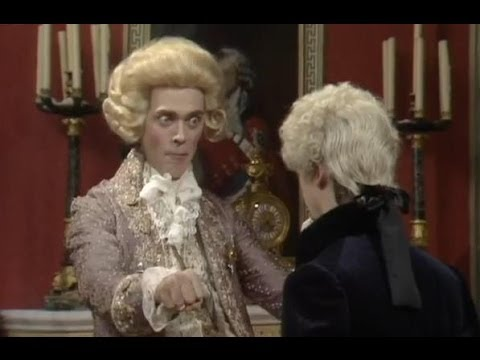

In [66]:
from IPython.display import YouTubeVideo
YouTubeVideo('T3jIE3b-bhY')

## Going beyond the notebook

In these workshops we have been writing and running all our code within the notebook interface. The notebook is very useful to write and test small pieces of code, or when the output of our code involves plotting. All that we have learned can however be transposed to stand-alone Python programs, which are nothing but code written on text files saved with the extension .py.

We will be looking at two examples, but will first do some preliminary work within the notebook.

### Interactivity: reading user input

One important aspect when running a program outside of the notebook, where the user cannot see or change variable values easily, is to provide a way to prompt the user for input. The function *input()* prompts the user and collects input typed on the keyboard. This is the simplest way to create interactive programs.

    keys=input("I will collect what you type: ")
    print("What you typed was:",keys)

In [67]:
keys=input("I will collect what you type: ")
print("What you typed was:", keys)

I will collect what you type: hi
What you typed was: hi


The first line of code will present the user with a string, and in the notebook a text box where whatever you type on the keyboard until you hit return is "collected" (outside of the notebook this textbox does not appear, but we will have the chance to check the behaviour later on). Whatever you type is stored as a string in variable *keys* in this case.

If we expect numerical input from the user, the string needs to be converted.

    number_string=input("How many carbon atoms are there in butene?")
    number_number=int(number_string)
    if number_number == 4:
       print("Obviously!")
    else:
       print("Are you a physicist, or what?!")

In [68]:
number_string=input("How many carbon atoms are there in butene?")
number_number=int(number_string)
if number_number==4:
    print("yes")
else:
    print("you are a physicist")

How many carbon atoms are there in butene?2
you are a physicist


### SMILES generator

In the exercise above we were working with strings of chemical formulas, but chemical formulas can be ambiguous with respect to chemical structure. [SMILES codes](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html) is a much less ambiguous way of representing a chemical structure with a single string. The image below shows the structure and respective SMILES codes for two mono-unsaturated fatty acids which differ on the configuration of the double bond.

<img src="fatty_acids.svg" />

We note that an aliphatic chain can be written as a succession of 'C' characters, with double bonds represented by '='. We can use the forward and backward slash to determine double bond configuration, or we can leave them out if we want to leave it unspecified. No need to include hydrogens. We will not say much more about it, but you can follow the link to [know more about SMILES](http://www.daylight.com/meetings/summerschool98/course/dave/smiles-intro.html).

In this section we will be writing a program to write SMILES strings for mono-unsaturated fatty acids, by prompting the user for the total chain length, the position of the double bond, and the orientation of the double bond.

The core of our program is going to be the function *fatty_gen()*, that receives 3 arguments: chain length, double bond position, and a string specifying orientation. The string can have the values 'Z' or 'E', any other string would count as an unspecified orientation, and should give a result accordingly. The output of the function should be a string with the SMILES code of the fatty acid. Write such a function below (see note on <a href="#backslashes">backslashes</a>).

In [82]:
def fatty_gen(chain_length, DB_position, orientation):
    "Generate the SMILES code for a specific molecule"
    if orientation=="Z":
        SMILES= (DB_position-1)*"C" + "\C=C\\" + (chain_length-DB_position-1)*"C" + "(=0)O"
    if orientation=="E":
        SMILES=(DB_position-1)*"C" + "/C=C\\" + (chain_length-DB_position-1)*"C" + "(=0)O"
    return SMILES

In [84]:
print(fatty_gen(6,1,"E"))

/C=C\CCCC(=0)O


In order to test your function, you can insert the resulting string into the program Avogadro and observe the generated structure. (In the program main window select Build > Insert > SMILES...).

Once you are convinced your function is doing the right thing, let us move to build our stand-alone program.
In this part of the workshop it is perhaps better if you work with 3 windows open side by side: one window with this notebook, a second window with a text editor (for example notepad++), and a third window which will popup when you run the program.

Copy the function fatty_gen() you defined above to the text editor, and save the file as fatty_gen.py. Our program at the moment defines the function fatty_gen() but never actually calls it, so if we run the program nothing happens. To complete the script we need to do 3 more things:

* Ask the user for input to get the 3 arguments needed to run fatty_gen().
* Run fatty_gen() with the input given.
* Print the output of fatty_gen().

The last step is actually important when running code outside of the notebook. In the notebook the output of a function is returned in an Out[] cell, but when running on the console cells don't exist, and we must write specific code to print to the screen.

Once you finished writing your code on the text editor, save the file and double click on it to run it.
You should see a terminal popping where your program is running.
If you are getting an alert mentioning that the operating system doesn't know how to open the fatty_gen.py file, select to open the file with the Python interpreter which should be in C:\anaconda\python.exe. Ask for help if you are having difficulties.

The terminal window should be closing before you have a chance to look at the result of the program. This is because the window is closing as soon as the program ends after the last print() statement. A little trick that we can use to keep the window open, is to add another prompt at the very end of the program, so it waits until the user presses return.

    input("Press return to close the window.")

#### <a id="backslashes"></a>A note on backslashes ('\') 

In defining the function *fatty_gen()* above we need to manipulate the backslash '\' character in strings.

The backslash is a special character that has some [specific uses](https://docs.python.org/2.0/ref/strings.html) in Python. In specifying a string with a backslash we can use two backslashes

    butene='C/C=C\\C'
    butene

In [78]:
butene='C/C=C\\C'
butene

'C/C=C\\C'

When using a notebook, the string will be displayed in an output cell in Python's "internal representation" with '\\\\'.
But if we use print(), Python will "translate" from its internal representation and display a single backslash

    print(butene)

In [85]:
print(butene)

C/C=C\C


**Note:** the function *fatty_gen()* should return a string, and its results will be displayed with '\\\\' on an output cell.

### Extra: <a id="battleship"></a>Battleship

#### The game

In this section we will be writing a computer game which is a simplified version of the pencil and paper game [Battleship](https://en.wikipedia.org/wiki/Battleship_(game)). The game will work as follows:

* We define a square grid with 5&times;5 elements.
* The computer randomly assigns one of the elements of the grid to represent a hidden ship. All other grid elements are the ocean.
* The player as 5 shots to sink the ship: guess where the ship is.

#### What should the program do

We want to write a stand-alone program that:

1. Sets up the grid by hidding the ship in one of the grid elements.
2. Shows the grid to the player (not showing the hidden ship, but including any shots made).
3. Asks the player for a guess position.
4. Checks whether the choice is a hit.
5. Inform the user of success, or update the grid with the guess shot and go back to point 2.

#### Designing a solution

How to go about solving this problem? This is the design phase, and it is not a bad idea to get a pencil and paper out and draw a diagram of how to break down the different tasks.

A second stage of design is to define what data we need to keep track of (what are our global variables) and what operations need to occur during the program that use or change this data (what functions need to be defined, along with what their arguments and output should be). If we go through in detail what the program needs to do as suggested in the section above, the task of determining what functions to define can be greatly simplified.

What follows is one suggestion for the program design, you can choose a different route if you wish.

##### Variables

One crucial variable of the program is the position of the hidden ship. This could be deffined by the two coordinates on the grid and stored as a 2 element list with the variable name *hidden_ship*.

Another important piece of information important to keep track of is the shots already made. This will be a list of 2 element lists. This list will start empty, and will be added to during the game. We will call this list *shots*.

These are the 2 pieces of information that we need to keep. Note that although we could have decided differently, we are choosing not to keep track of the full grid. We can build this grid with information from *shots* at any one time.

##### Functions

Regarding functions we can follow the outline of the program given above.

We will need a function to generate the random position *hidden_ship* (we will see how to do this below). We will call this function *hide()*. This function does not need any input, and should output a list with the two coordinates.

We will need a function that displays the current grid to the player. We can represent the grid as a 5&times;5 list of lists. We will use the string 'O' to represent positions not yet tried, and 'X', for previous shots.
Our initial grid will thus look like:

    [['O','O','O','O','O'],
     ['O','O','O','O','O'],
     ['O','O','O','O','O'],
     ['O','O','O','O','O'],
     ['O','O','O','O','O']]
     
And when the player shoots the position [1,3] (**we will be using Python list indexing numbering in the game**) it will look like:

    [['O','O','O','O','O'],
     ['O','O','O','X','O'],
     ['O','O','O','O','O'],
     ['O','O','O','O','O'],
     ['O','O','O','O','O']]
     
We will separate the task of presenting the grid to the player into two functions. *build_grid()* will construct the 5&times;5 2D list as above, and *print_grid()* will print the grid for the user to see. *build_grid* should receive the *shots* list as input, and output a 5&times;5 2D list.
*print_grid()* should receive a 5&times;5 2D list and output nothing (only print to the screen).

We will need a function that asks the player for a guess position, and it should do a few checks to see if the choice is valid: within the grid and not repeated. This function should add the guess to the list *shots*. Let us call this function *shoot()*. This function should receive as argument the list *shots*, and should output an updated *shots* list.

We should have a function *check()* which will check and inform the user if he was successful, if he has more tries or if the game is over. This function should receive the lists *hidden_ship* *shots* as arguments, and returns no output (only prints to screen).    

##### Putting it together

Once we have defined our functions, writing the program is relativelly simple.

    hidden_ship=hide()
    shots=[]
    
    while hidden_ship not in shots and len(shots)<=5:
         grid=build_grid(shots)
         print_grid(grid)
         shots=shoot(shots)
         check(hidden_ship,shots)
         
It is normal that there are still unclear aspects about the design of the program, and things should become clearer once we start the implementation phase below. Nevertheless you are welcome to discuss with a demonstrator any aspects of this solution.

We will implement the individual functions inside the notebook and make sure they work as expected, and then write them down in a stand-alone program.

#### Implementation

Here we will implement the different functions we have specified above.

The function *hide()* needs to output a list with two random integers between 0 and 4. In order to generate integer random numbers we can use the function *randint()* of the numpy module.

    from numpy.random import randint
    randint(0,100)

The code above generates a random integer between 0 and 100. Note that if you run the cell again you will obtain a different number.

Define the function *hide()* below.

We now want to define the function *build_grid()* which receives a list *shots* as an argument, and returns a 5&times;5 2D list of 'O' everywhere and 'X' at the positions *shots*. It is probably easier to first build a grid with 'O' everywhere, and then loop through *shots* and redefine the positions of the grid accordingly.

The function *print_grid()* should receive as input the output of *build_grid()* and print it in a convenient fashion to the screen. Note that simply unsing the function print on a list does not convey the idea of a grid.

    print([['O','O','O'],['O','O','X'],['O','O','O']])

A nicer output would look like:

    O O O
    O O X
    O O O
    
This could be done by looping through the rows of the grid, building a convenient string and printing it out.

Define the function *print_grid()* below.

The function *shoot()*, should receive the lits *shots* as input, ask the user for the row and column guess, and output the list *shots* updated. A first implementation can be quite simple.

If you are feeling confortable, you should implements some checks, since the wrong player input can cause errors in the program later on. We should use a loop and keep on prompting the user for input until the guess is sensible, informing them of what the problem with input is at each stage. We should check if the guess is in the range of the grid, and if the entered guess is a repeat and is already in *shots*.

The function *check()* receives the list *hidden_ship* and *shots*, and it should check whether the last element of *shots* matches *hidden_ship* and inform the player of what happens. It does not have to output anything, just print things to the screen.

There are three possibilities: ship sunk; tell the player how many shots are still available (determined by the current length of *shots*); or game over.

When you are convinced that your functions are doing the right thing, you can copy them to a text file, and the main code structure above. Don't forget to import any module that you are using. Run the program, and have fun!

If there is anything in your program that you want to improve, just change your functions accordingly.

## Summary

In building complex programs we can draw upon code written by others importing external modules, thus increasing the functionality available in the standard Python language. 

We have also seen how to run programs outside of the notebook and how to provide a mechanism for user input.

We wrote a program to generate SMILES codes for mono-unsaturated fatty acids, and wrote a simple computer game. In doing so we've illustrated how to use functions to breakdown a more complex problems into simpler parts.